In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
vals = [json.loads(line) for line in open('results/bot_results_new_style.txt')]
df = pd.DataFrame(vals)

df = df.assign(
    guesser = lambda dataframe: dataframe['guesser'].map(lambda guesser: guesser[guesser.index('.')+1:-2]),
    codemaster = lambda dataframe: dataframe['codemaster'].map(lambda codemaster: codemaster[codemaster.index('.')+1:-2])

).drop('cm_kwargs', axis=1).drop('g_kwargs', axis=1).drop('game_name',axis=1)
print("Average turns for 8 tiles: ",df['total_turns'].mean())

df

Average turns for 8 tiles:  7.030769230769231


,total_turns,R,B,C,A,codemaster,guesser,seed,time_s
0,7,8,0,1,0,codemaster_w2v_07.AICodemaster,guesser_w2vglove.AIGuesser,150,1.653886e+09
1,9,8,0,1,0,codemaster_w2v_03.AICodemaster,guesser_w2vglove.AIGuesser,100,1.653886e+09
2,8,8,0,0,0,codemaster_glove_05.AICodemaster,guesser_w2vglove.AIGuesser,200,1.653886e+09
3,8,8,0,0,0,codemaster_w2v_03.AICodemaster,guesser_w2vglove.AIGuesser,150,1.653886e+09
4,10,8,1,3,0,codemaster_w2v_07.AICodemaster,guesser_w2vglove.AIGuesser,200,1.653886e+09
...,...,...,...,...,...,...,...,...,...
255,9,8,1,0,0,codemaster_w2vglove_03.AICodemaster,guesser_w2vglove.AIGuesser,450,1.653910e+09
256,6,8,0,0,0,codemaster_w2vglove_05.AICodemaster,guesser_w2vglove.AIGuesser,500,1.653910e+09
257,8,8,0,0,0,codemaster_w2vglove_03.AICodemaster,guesser_w2vglove.AIGuesser,500,1.653910e+09
258,8,8,0,0,0,codemaster_w2vglove_03.AICodemaster,guesser_w2vglove.AIGuesser,550,1.653911e+09


In [3]:
df.groupby('guesser')['total_turns'].mean()

guesser
guesser_w2vglove.AIGuesser    7.030769
Name: total_turns, dtype: float64

In [4]:
df.groupby('codemaster')['total_turns'].mean()

codemaster
codemaster_glove_03.AICodemaster       8.175000
codemaster_glove_05.AICodemaster       7.075000
codemaster_glove_07.AICodemaster       5.200000
codemaster_w2v_03.AICodemaster         8.700000
codemaster_w2v_05.AICodemaster         8.600000
codemaster_w2v_07.AICodemaster         9.400000
codemaster_w2vglove_03.AICodemaster    8.150000
codemaster_w2vglove_05.AICodemaster    7.075000
codemaster_w2vglove_07.AICodemaster    4.466667
Name: total_turns, dtype: float64

<AxesSubplot:xlabel='codemaster'>

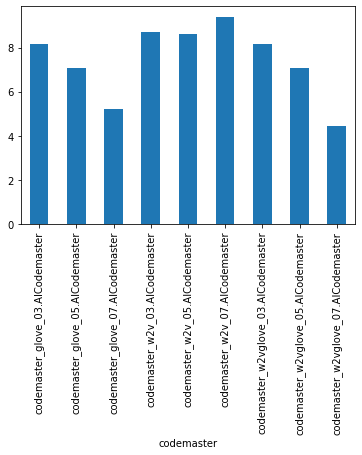

In [5]:
df.groupby('codemaster')['total_turns'].mean().plot.bar(x='codemaster', y='total_turns', rot=90)


<AxesSubplot:xlabel='guesser'>

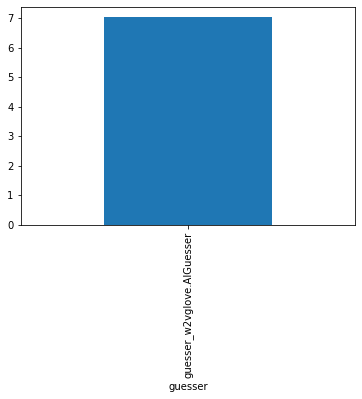

In [7]:
df.groupby('guesser')['total_turns'].mean().plot.bar(x='guesser', y='total_turns', rot=90)
